In [120]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [121]:
train = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\Loan Approval System\Loan Data\train.csv')

In [122]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [123]:
train.Loan_Status = train.Loan_Status.map({'Y': 1, 'N': 0})

In [124]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


## Check the misssing value 

In [125]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [126]:
Loan_status=train.Loan_Status

In [127]:
train.drop('Loan_Status', axis=1, inplace=True)
test = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\Loan Approval System\Loan Data\test.csv')
Loan_ID = test.Loan_ID
data = pd.concat([train, test], ignore_index=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [128]:
## Dropping Loan ID from data, it's not useful
data.drop('Loan_ID',inplace=True,axis=1)

In [129]:
data.shape

(981, 11)

In [130]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [131]:
data.isnull().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [132]:
data.Dependents.dtypes

dtype('O')

## Visualization 

[Text(0.5, 1.0, 'Gender vs Loan Status')]

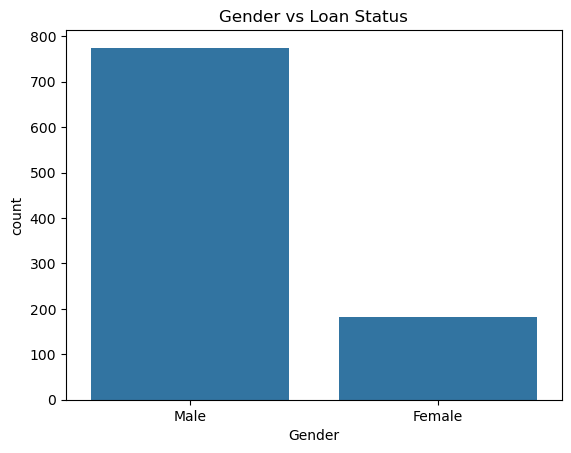

In [133]:
sns.countplot(data=data, x='Gender').set(title='Gender vs Loan Status')

[Text(0.5, 1.0, 'Marital Status vs Loan Status')]

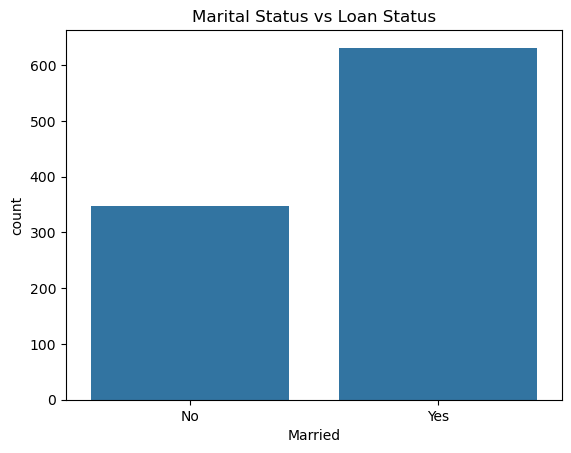

In [134]:
sns.countplot(data=data, x='Married').set(title='Marital Status vs Loan Status')

[Text(0.5, 1.0, 'Education vs Loan Status')]

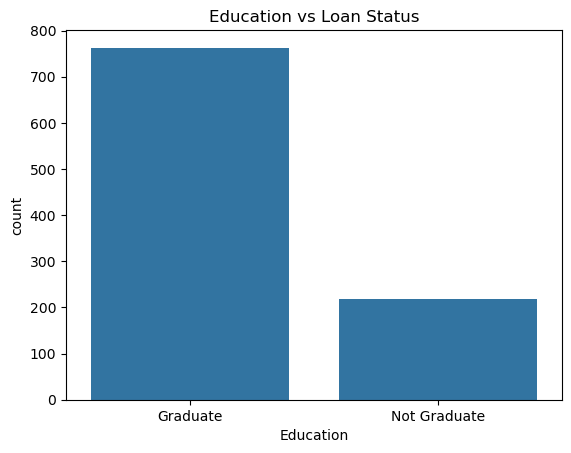

In [135]:
sns.countplot(data=data, x='Education').set(title='Education vs Loan Status')

[Text(0.5, 1.0, 'Self Employed vs Loan Status')]

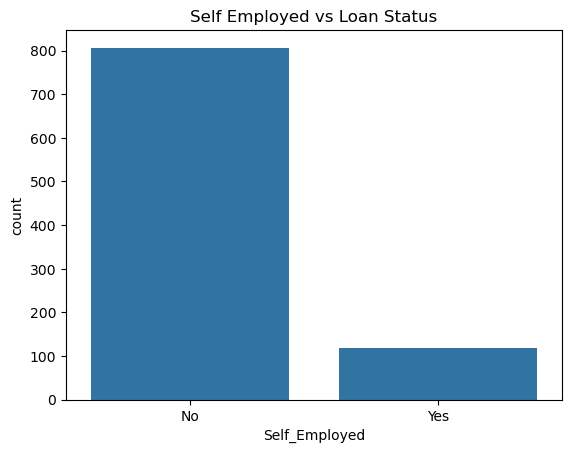

In [136]:
sns.countplot(data=data, x='Self_Employed').set(title='Self Employed vs Loan Status')

[Text(0.5, 1.0, 'Property Area Distribution')]

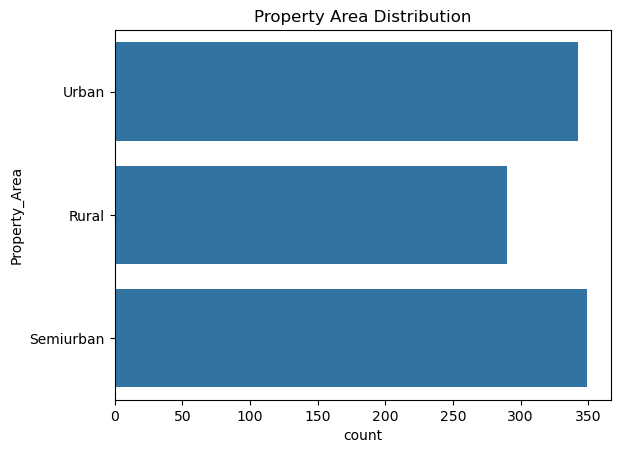

In [137]:
sns.countplot(data=data, y='Property_Area').set(title='Property Area Distribution')

[Text(0.5, 1.0, 'Credit History Distribution')]

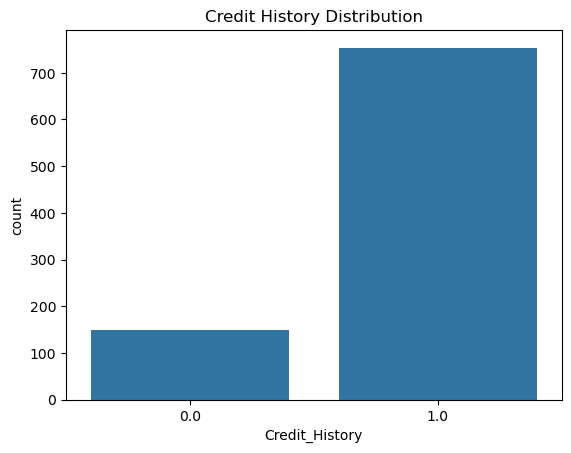

In [138]:
sns.countplot(data=data, x='Credit_History').set(title='Credit History Distribution')

[Text(0.5, 1.0, 'Applicant Income Distribution')]

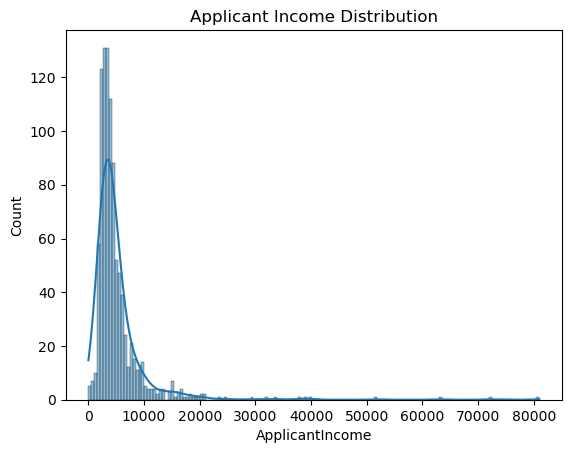

In [139]:
sns.histplot(data['ApplicantIncome'], kde=True).set(title='Applicant Income Distribution')

[Text(0.5, 1.0, 'Coapplicant Income Distribution')]

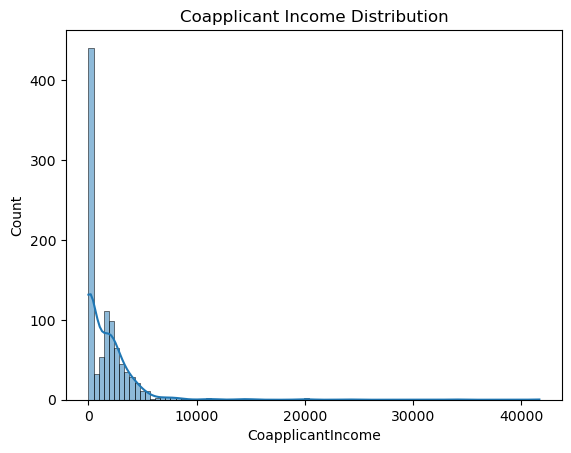

In [140]:
sns.histplot(data['CoapplicantIncome'], kde=True).set(title='Coapplicant Income Distribution')

[Text(0.5, 1.0, 'Loan Amount Distribution')]

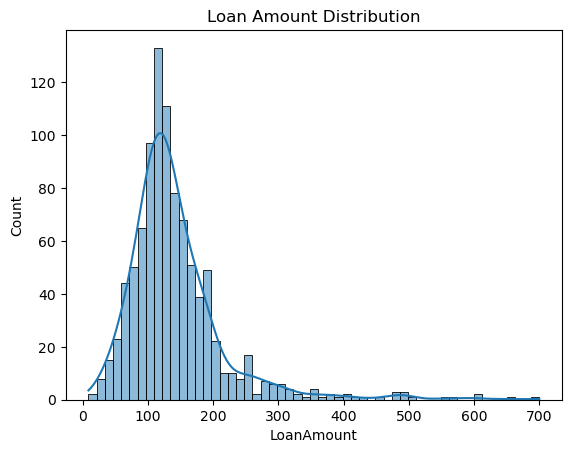

In [141]:
sns.histplot(data['LoanAmount'], kde=True).set(title='Loan Amount Distribution')

[Text(0.5, 1.0, 'Loan Amount Term Distribution')]

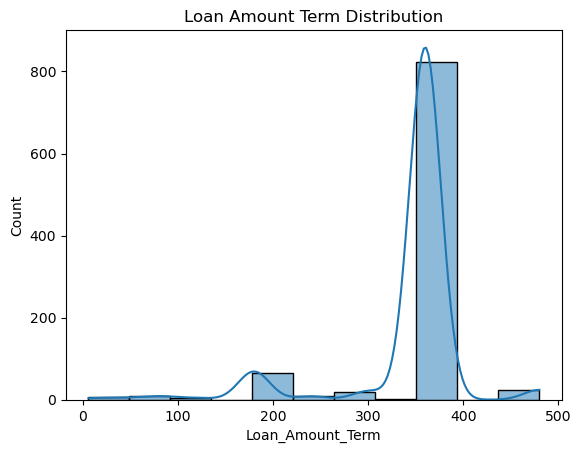

In [142]:
sns.histplot(data['Loan_Amount_Term'], kde=True).set(title='Loan Amount Term Distribution')

Text(0.5, 1.0, 'Gender vs Loan Status')

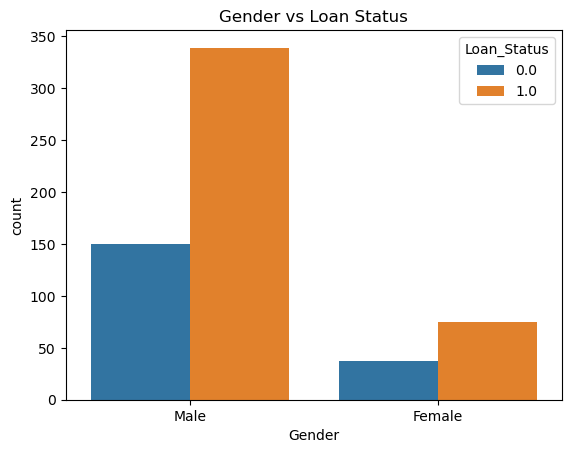

In [143]:
loan_status_col = Loan_status
sns.countplot(x='Gender', data=data.assign(Loan_Status=loan_status_col), hue='Loan_Status')
plt.title('Gender vs Loan Status')

Text(0.5, 1.0, 'Marital Status vs Loan Status')

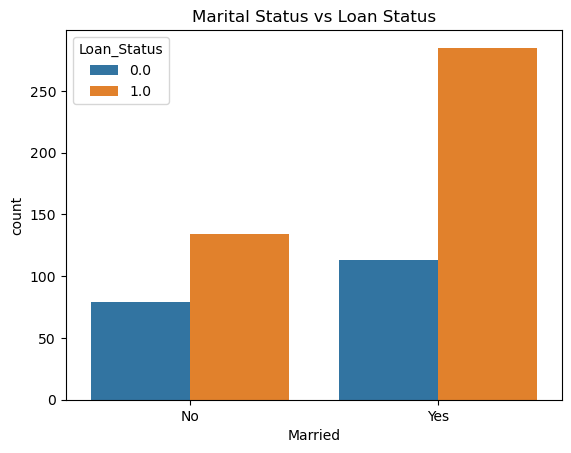

In [144]:
sns.countplot(x='Married', data=data.assign(Loan_Status=loan_status_col), hue='Loan_Status')
plt.title('Marital Status vs Loan Status')

Text(0.5, 1.0, 'Education vs Loan Status')

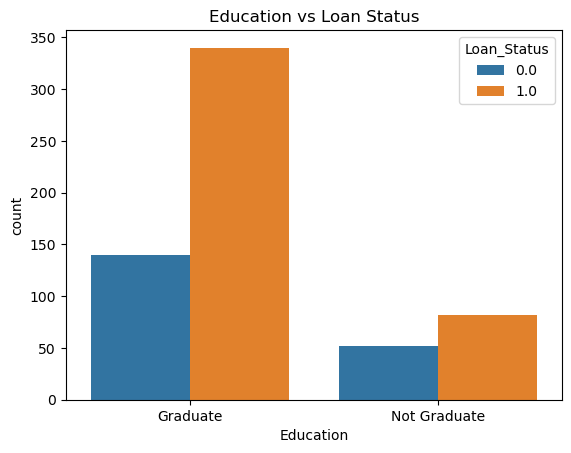

In [145]:
sns.countplot(x='Education', data=data.assign(Loan_Status=loan_status_col), hue='Loan_Status')
plt.title('Education vs Loan Status')

Text(0.5, 1.0, 'Self Employed vs Loan Status')

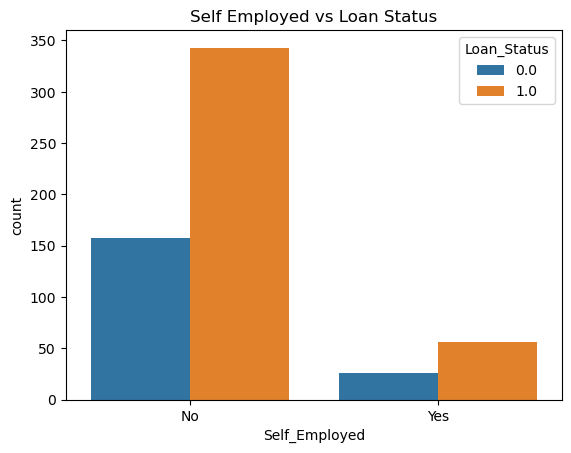

In [146]:
sns.countplot(x='Self_Employed', data=data.assign(Loan_Status=loan_status_col), hue='Loan_Status')
plt.title('Self Employed vs Loan Status')

Text(0.5, 1.0, 'Correlation Heatmap')

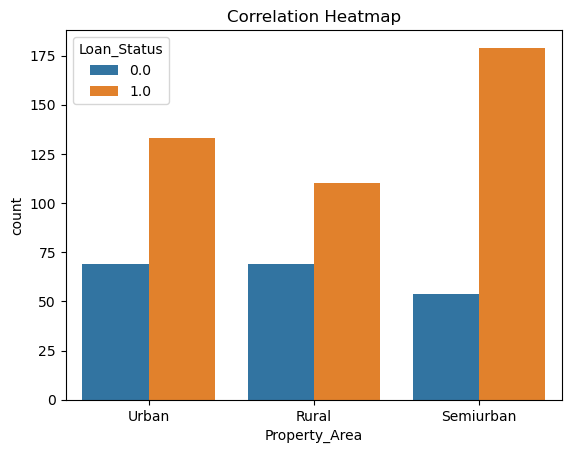

In [147]:
sns.countplot(x='Property_Area', data=data.assign(Loan_Status=loan_status_col), hue='Loan_Status')
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Credit History vs Loan Status')

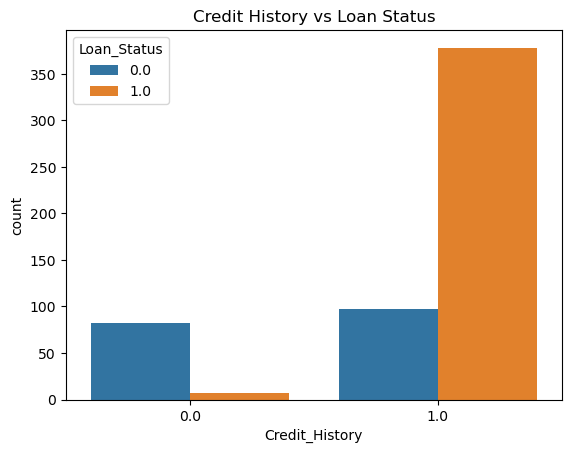

In [148]:
sns.countplot(x='Credit_History', data=data.assign(Loan_Status=loan_status_col), hue='Loan_Status')
plt.title('Credit History vs Loan Status')

Text(0.5, 1.0, 'Applicant Income vs Loan Status')

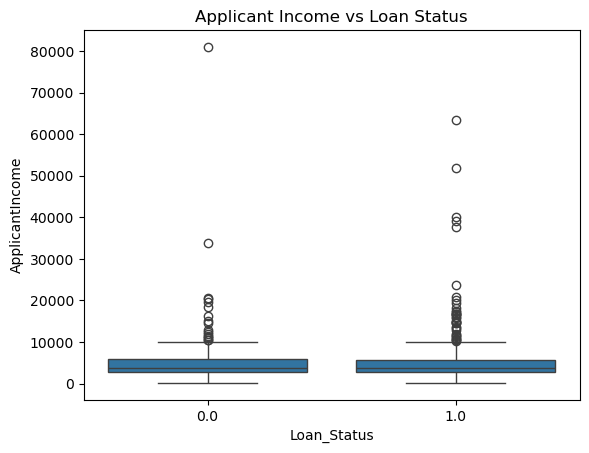

In [149]:
sns.boxplot(x=loan_status_col, y='ApplicantIncome', data=data)
plt.title('Applicant Income vs Loan Status')

Text(0.5, 1.0, 'Coapplicant Income vs Loan Status')

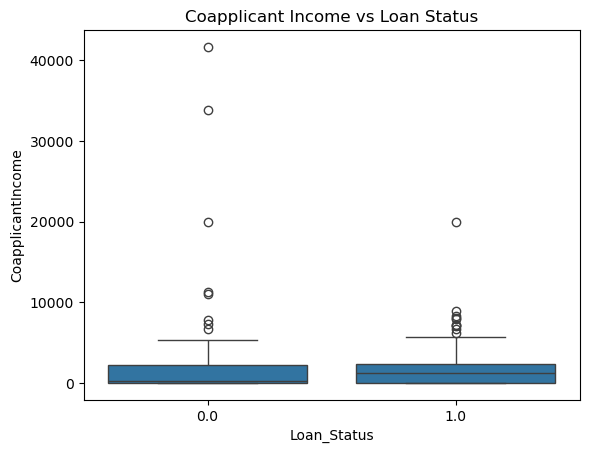

In [150]:
sns.boxplot(x=loan_status_col, y='CoapplicantIncome', data=data)
plt.title('Coapplicant Income vs Loan Status')

Text(0.5, 1.0, 'Loan Amount vs Loan Status')

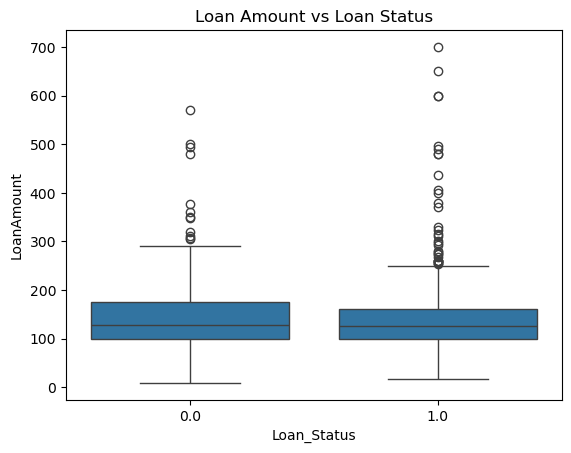

In [151]:
sns.boxplot(x=loan_status_col, y='LoanAmount', data=data)
plt.title('Loan Amount vs Loan Status')

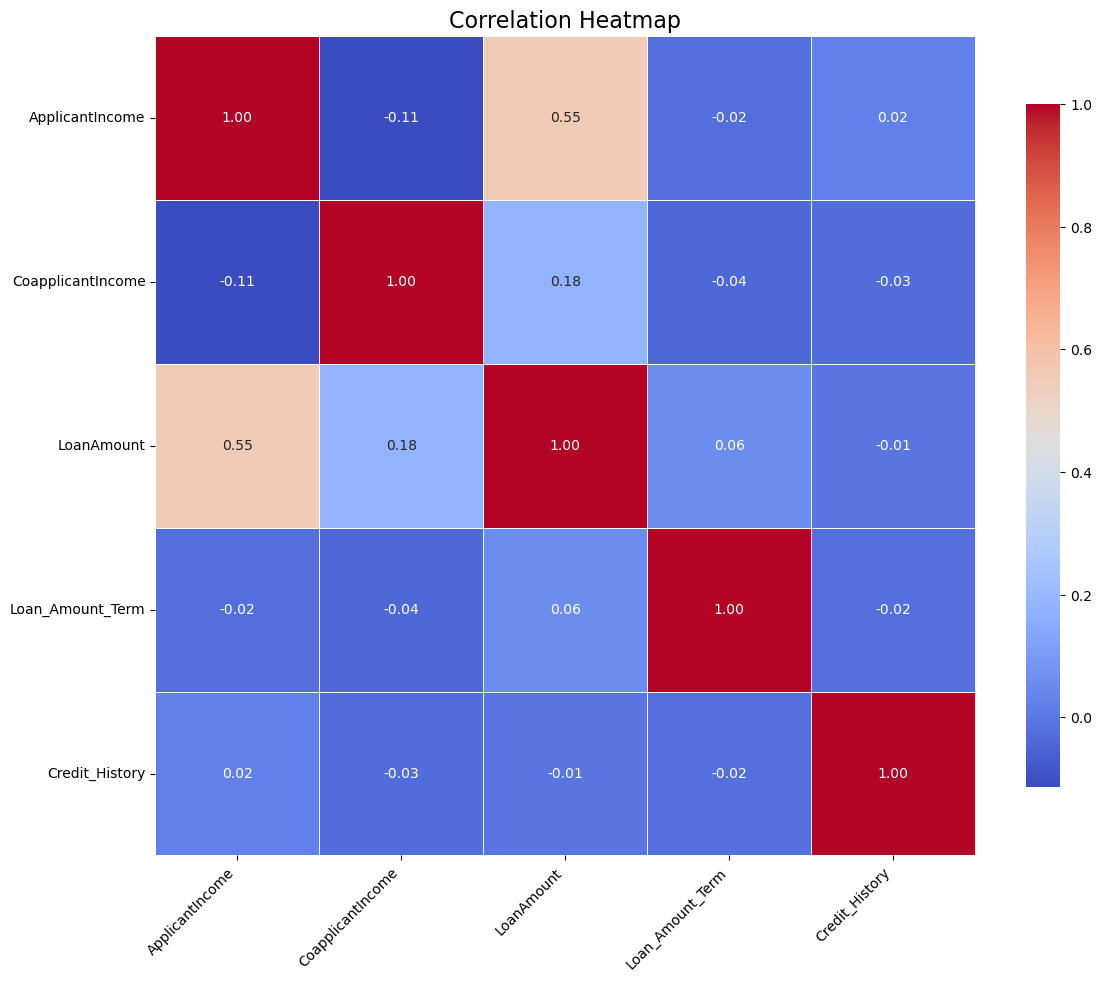

In [152]:
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Label Encode

In [153]:
## Label encoding for gender
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

Gender
1.0    775
0.0    182
Name: count, dtype: int64

In [154]:
## Labelling 0 & 1 for Marrital status
data.Married=data.Married.map({'Yes':1,'No':0})
data.Married.value_counts()

Married
1.0    631
0.0    347
Name: count, dtype: int64

In [155]:
## Labelling 0 & 1 for Dependents
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
data.Dependents.value_counts()

Dependents
0.0    545
1.0    160
2.0    160
3.0     91
Name: count, dtype: int64

In [156]:
## Labelling 0 & 1 for Education Status
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})
data.Education.value_counts()

Education
1    763
0    218
Name: count, dtype: int64

In [157]:
## Labelling 0 & 1 for Employment status
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})
data.Self_Employed.value_counts()

Self_Employed
0.0    807
1.0    119
Name: count, dtype: int64

In [158]:
data.Property_Area.value_counts()

Property_Area
Semiurban    349
Urban        342
Rural        290
Name: count, dtype: int64

In [159]:
## Labelling 0 & 1 for Property area
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
data.Property_Area.value_counts()

Property_Area
1    349
2    342
0    290
Name: count, dtype: int64

In [160]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [161]:
data.Credit_History.size

981

## Handaling missing value

In [162]:
data.fillna({'Credit_History': np.random.randint(0, 2)}, inplace=True)

In [163]:
data.fillna({'Married': np.random.randint(0,2)},inplace=True)

In [164]:
## Filling with median
data.fillna({'LoanAmount': data['LoanAmount'].median()}, inplace=True)

In [165]:
## Filling with mean
data.fillna({'Loan_Amount_Term': data['Loan_Amount_Term'].mean()}, inplace=True)

In [166]:
data.Gender.value_counts()

Gender
1.0    775
0.0    182
Name: count, dtype: int64

In [167]:
data.fillna({'Gender': np.random.randint(0,2)}, inplace=True)

In [168]:
data.Gender.value_counts()

Gender
1.0    775
0.0    206
Name: count, dtype: int64

In [169]:
## Filling Dependents with median
data.fillna({'Dependents': data['Dependents'].median()}, inplace=True)

In [170]:
data.fillna({'Self_Employed': np.random.randint(0,2)},inplace=True)

In [171]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Split the Data into X & Y

In [172]:
train_X=data.iloc[:614,] ## all the data in X (Train set)
train_y=Loan_status  ## Loan status will be our Y

In [173]:
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=0)

In [174]:
train_X.shape,test_X.shape

((460, 11), (154, 11))

## Model Selection

In [175]:
# Fit all models
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
models= []
models.append((
    "Logistic Regression",
    Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(max_iter=2000))
    ])
))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("Random Forest", RandomForestClassifier()))
models.append((
    "KNN",
    Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])
))

In [176]:
results=[]
names=[]

In [177]:
from sklearn.metrics import accuracy_score

for name, clf in models:
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    acc = accuracy_score(test_y, pred_y)
    results.append((name, acc))

In [178]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print(results_df.sort_values(by='Accuracy', ascending=False))

                 Model  Accuracy
0  Logistic Regression  0.798701
2        Random Forest  0.759740
3                  KNN  0.759740
1        Decision Tree  0.733766


In [179]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

LR=LogisticRegression(max_iter=2000)
LR.fit(train_X_scaled,train_y)
pred=LR.predict(test_X_scaled)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Model Accuracy:-  0.7987012987012987
[[ 23  20]
 [ 11 100]]
              precision    recall  f1-score   support

           0       0.68      0.53      0.60        43
           1       0.83      0.90      0.87       111

    accuracy                           0.80       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.79      0.80      0.79       154



In [180]:
print(pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 0]


In [181]:
X_test=data.iloc[614:,] 

In [182]:
X_test.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
614,1.0,1.0,0.0,1,0.0,5720,0.0,110.0,360.0,1.0,2
615,1.0,1.0,1.0,1,0.0,3076,1500.0,126.0,360.0,1.0,2
616,1.0,1.0,2.0,1,0.0,5000,1800.0,208.0,360.0,1.0,2
617,1.0,1.0,2.0,1,0.0,2340,2546.0,100.0,360.0,0.0,2
618,1.0,0.0,0.0,0,0.0,3276,0.0,78.0,360.0,1.0,2


In [183]:
prediction = LR.predict(scaler.transform(X_test))
prediction

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [184]:
## TAken data from the dataset
t = LR.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])
print(t)

[0]


In [185]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=5000)
LR.fit(train_X_scaled, train_y)

LogisticRegression(max_iter=5000)

In [186]:
import pickle

file = 'Model1.pkl'

with open(file, 'wb') as f:
    pickle.dump(LR, f)

In [187]:
with open(file, 'rb') as f:
    loaded_model = pickle.load(f)

In [188]:
cy = loaded_model.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])
print(cy)

[0]
